College Basketball Dataset6

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns  # data visualisation
%matplotlib inline

In [2]:
#importing combined data: 
# cbb.csv

CBB = pd.read_csv("D:/Medium/2 Learned/College Basketball Dataset/cbb.csv")

In [3]:
CBB.head()

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   

   ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
0  ...  30.4  53.9  44.6  32.7  36.2   71.7   8.6         2ND   1.0  2016  
1  ...  22.4  54.8  44.7  36.5  37.5   59.3  11.3         2ND   1.0  2015  
2  ...  30.0  54.7  46.8  35.2  33.2   65.9   6.9         2ND   3.0  2018  
3  ...  36.6  52.8  41.9  36.5  29.7   67.5   7.0         2ND   3.0  2019  
4  ...  26.9  56.3  40.0  38.2  29.0   71.5   7.7         2ND   1.0  2017  

[5 rows x 24 columns]

In [4]:
CBB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        2455 non-null   object 
 1   CONF        2455 non-null   object 
 2   G           2455 non-null   int64  
 3   W           2455 non-null   int64  
 4   ADJOE       2455 non-null   float64
 5   ADJDE       2455 non-null   float64
 6   BARTHAG     2455 non-null   float64
 7   EFG_O       2455 non-null   float64
 8   EFG_D       2455 non-null   float64
 9   TOR         2455 non-null   float64
 10  TORD        2455 non-null   float64
 11  ORB         2455 non-null   float64
 12  DRB         2455 non-null   float64
 13  FTR         2455 non-null   float64
 14  FTRD        2455 non-null   float64
 15  2P_O        2455 non-null   float64
 16  2P_D        2455 non-null   float64
 17  3P_O        2455 non-null   float64
 18  3P_D        2455 non-null   float64
 19  ADJ_T       2455 non-null  

We can infer that there are 3 categorical data types and rest are numerical.

In [5]:
CBB.shape

(2455, 24)

In [6]:
#Checking missing value 

def missing_check(CBB):
    total = CBB.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (CBB.isnull().sum()/CBB.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(CBB)

Total  Percent
SEED         1979  0.80611
POSTSEASON   1979  0.80611
TEAM            0  0.00000
CONF            0  0.00000
WAB             0  0.00000
ADJ_T           0  0.00000
3P_D            0  0.00000
3P_O            0  0.00000
2P_D            0  0.00000
2P_O            0  0.00000
FTRD            0  0.00000
FTR             0  0.00000
DRB             0  0.00000
ORB             0  0.00000
TORD            0  0.00000
TOR             0  0.00000
EFG_D           0  0.00000
EFG_O           0  0.00000
BARTHAG         0  0.00000
ADJDE           0  0.00000
ADJOE           0  0.00000
W               0  0.00000
G               0  0.00000
YEAR            0  0.00000


There are :

    POSTSEASON with 1417 null values accounting 80.6488% as it is column for round where the given team was eliminated or where their season ended
    SEED with 1417 null values accounting 80.6488% as it is column for Seed in the NCAA March Madness Tournament


To get an insights year wise we have to convert Year wise data type into categorical ones

In [7]:
CBB["YEAR"] = pd.Categorical(CBB["YEAR"])

In [8]:
CBB.describe()

G            W        ADJOE        ADJDE      BARTHAG  \
count  2455.000000  2455.000000  2455.000000  2455.000000  2455.000000   
mean     31.492464    16.284318   103.304481   103.304603     0.493957   
std       2.657401     6.610960     7.376981     6.605318     0.256244   
min      15.000000     0.000000    76.600000    84.000000     0.005000   
25%      30.000000    11.000000    98.300000    98.500000     0.282200   
50%      31.000000    16.000000   103.000000   103.500000     0.475000   
75%      33.000000    21.000000   108.000000   107.900000     0.712200   
max      40.000000    38.000000   129.100000   124.000000     0.984200   

             EFG_O        EFG_D          TOR         TORD          ORB  \
count  2455.000000  2455.000000  2455.000000  2455.000000  2455.000000   
mean     49.805132    50.001385    18.763055    18.689572    29.875642   
std       3.143061     2.939602     2.090595     2.201749     4.134332   
min      39.200000    39.600000    11.900000    10.200000    15.000000   
25%      47.750000    48.000000    17.300000    17.200000    27.100000   
50%      49.700000    50.000000    18.700000    18.600000    29.900000   
75%      51.900000    52.000000    20.100000    20.100000    32.600000   
max      59.800000    59.500000    27.100000    28.500000    43.600000   

               DRB          FTR        FTRD         2P_O         2P_D  \
count  2455.000000  2455.000000  2455.00000  2455.000000  2455.000000   
mean     30.075479    35.989776    36.26998    48.802281    48.976660   
std       3.151454     5.247820     6.24590     3.384468     3.340546   
min      18.400000    21.600000    21.80000    37.700000    37.700000   
25%      27.900000    32.400000    31.90000    46.500000    46.700000   
50%      30.000000    35.800000    35.80000    48.700000    49.000000   
75%      32.200000    39.500000    40.20000    51.000000    51.300000   
max      40.400000    58.600000    60.70000    62.600000    61.200000   

              3P_O         3P_D        ADJ_T          WAB        SEED  
count  2455.000000  2455.000000  2455.000000  2455.000000  476.000000  
mean     34.406395    34.598737    67.812301    -7.802485    8.802521  
std       2.789434     2.415766     3.277622     6.965736    4.676354  
min      24.900000    27.100000    57.200000   -25.200000    1.000000  
25%      32.500000    33.000000    65.700000   -13.000000    5.000000  
50%      34.400000    34.600000    67.800000    -8.300000    9.000000  
75%      36.300000    36.200000    70.000000    -3.150000   13.000000  
max      44.100000    43.100000    83.400000    13.100000   16.000000

In [9]:
#checking for skewness in a data
CBB.skew()

G          0.180665
W          0.229150
ADJOE      0.186358
ADJDE     -0.040077
BARTHAG    0.138919
EFG_O      0.003176
EFG_D     -0.022293
TOR        0.312543
TORD       0.366893
ORB       -0.060539
DRB        0.053958
FTR        0.257781
FTRD       0.484371
2P_O       0.110928
2P_D       0.007508
3P_O      -0.001430
3P_D       0.045071
ADJ_T      0.151543
WAB        0.306899
SEED      -0.067652
dtype: float64

In [10]:
CBB.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

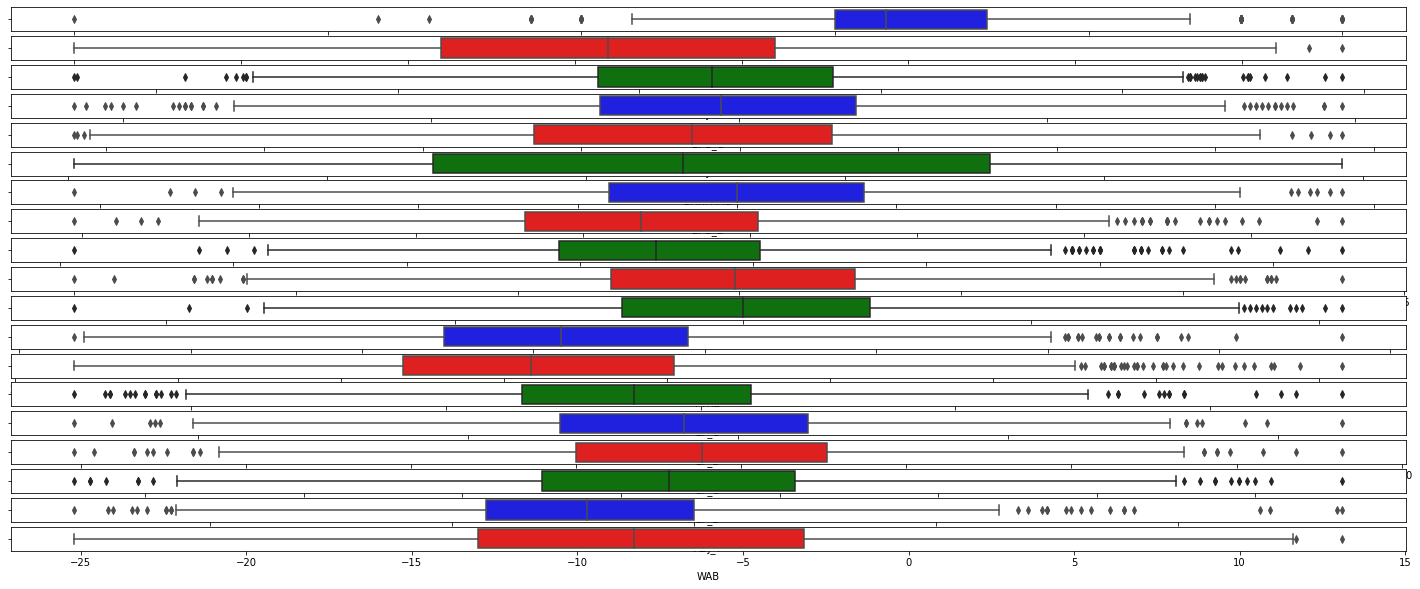

In [11]:
#cheking for outliers in a data through boxplot
plt.figure(figsize= (25,10))
plt.subplot(19,1,1)
sns.boxplot(x=CBB.G , color='blue')

plt.subplot(19,1,2)
sns.boxplot(x= CBB.W, color='red')

plt.subplot(19,1,3)
sns.boxplot(x= CBB.ADJOE, color='green')

plt.subplot(19,1,4)
sns.boxplot(x=CBB.EFG_O , color='blue')

plt.subplot(19,1,5)
sns.boxplot(x= CBB.ADJDE, color='red')

plt.subplot(19,1,6)
sns.boxplot(x= CBB.BARTHAG, color='green')

plt.subplot(19,1,7)
sns.boxplot(x=CBB.EFG_D , color='blue')

plt.subplot(19,1,8)
sns.boxplot(x= CBB.TOR, color='red')

plt.subplot(19,1,9)
sns.boxplot(x= CBB.TORD, color='green')

plt.subplot(19,1,10)
sns.boxplot(x= CBB.ORB, color='red')

plt.subplot(19,1,11)
sns.boxplot(x= CBB.DRB, color='green')

plt.subplot(19,1,12)
sns.boxplot(x=CBB.FTR , color='blue')

plt.subplot(19,1,13)
sns.boxplot(x= CBB.FTRD, color='red')

plt.subplot(19,1,14)
sns.boxplot(x= CBB['2P_O'], color='green')

plt.subplot(19,1,15)
sns.boxplot(x=CBB['2P_D'], color='blue')

plt.subplot(19,1,16)
sns.boxplot(x= CBB['3P_O'], color='red')

plt.subplot(19,1,17)
sns.boxplot(x= CBB['3P_D'], color='green')

plt.subplot(19,1,18)
sns.boxplot(x=CBB.ADJ_T , color='blue')

plt.subplot(19,1,19)
sns.boxplot(x= CBB.WAB, color='red')

plt.show()


    As we can infer through above boxplots that outliers are present in all the variable.
    Henceforth, outliers treatment have to be done.


In [12]:
CBB_Outlier_Treatment = CBB.drop(columns = ["TEAM", "CONF", "POSTSEASON","SEED","YEAR"])
CBB_Outlier_Treatment

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  \
0     40  33  123.3   94.9   0.9531   52.6   48.1  15.4  18.2  40.7  30.0   
1     40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  23.7   
2     40  33  114.4   90.4   0.9375   53.9   47.7  14.0  19.5  25.5  24.9   
3     38  31  115.2   85.2   0.9696   53.5   43.0  17.7  22.8  27.4  28.7   
4     39  37  117.8   86.3   0.9728   56.6   41.1  16.2  17.1  30.0  26.2   
...   ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   
2450  35  26  111.4   87.8   0.9392   50.6   44.5  20.8  19.2  36.1  27.6   
2451  35  27  114.4   92.2   0.9229   52.5   46.6  19.5  19.8  35.0  26.7   
2452  37  28  104.8   88.6   0.8728   49.3   46.4  21.4  22.0  35.8  27.2   
2453  34  24  112.0   96.2   0.8516   51.9   49.3  17.1  21.3  29.0  34.2   
2454  35  24  103.4   96.3   0.6952   51.6   46.9  21.0  22.1  32.5  32.8   

       FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  
0     32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6  
1     36.2  22.4  54.8  44.7  36.5  37.5   59.3  11.3  
2     30.7  30.0  54.7  46.8  35.2  33.2   65.9   6.9  
3     32.9  36.6  52.8  41.9  36.5  29.7   67.5   7.0  
4     39.0  26.9  56.3  40.0  38.2  29.0   71.5   7.7  
...    ...   ...   ...   ...   ...   ...    ...   ...  
2450  36.6  32.4  50.4  44.3  34.1  30.1   64.4   6.7  
2451  37.4  32.9  50.6  43.4  37.1  35.8   66.8   4.6  
2452  38.4  33.3  49.1  44.9  33.3  33.4   69.2   2.9  
2453  31.3  28.5  49.3  50.6  37.7  30.2   66.0   0.3  
2454  35.2  32.7  52.3  46.9  33.4  31.3   69.1  -4.0  

[2455 rows x 19 columns]

In [13]:
from scipy import stats
z = np.abs(stats.zscore(CBB_Outlier_Treatment))   # get the z-score of every value with respect to their columns
print(z)

[[3.20210172 2.52899561 2.71108118 ... 0.66297342 1.18637549 2.35521806]
 [3.20210172 2.98287997 3.4974709  ... 1.20121455 2.59762572 2.74290863]
 [3.20210172 2.52899561 1.50437971 ... 0.57912148 0.58356056 2.11111658]
 ...
 [2.07294922 1.77252167 0.20276914 ... 0.49631515 0.42347202 1.53676017]
 [0.94379671 1.16734252 1.17897707 ... 1.82121638 0.55304442 1.16342851]
 [1.32018088 1.16734252 0.01295094 ... 1.36578158 0.39295588 0.54599537]]


Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [14]:
threshold = 3 # In a Normal distribution standard deviation is within or equal to 3 times
print ("Rows and columns location showing outlier value:")
np.where(z > threshold)

Rows and columns location showing outlier value:


(array([   0,    1,    1,    1,    2,    4,    4,    5,    5,   10,   11,
          11,   11,   11,   12,   13,   13,   33,   49,   49,   49,   49,
          54,   62,   70,   80,   89,  101,  160,  258,  258,  364,  422,
         431,  451,  521,  548,  555,  561,  584,  692,  787,  791,  814,
         815,  827,  831,  831,  838,  848,  886,  912,  928,  931,  976,
         978,  985,  997, 1008, 1020, 1039, 1067, 1089, 1178, 1178, 1187,
        1197, 1209, 1253, 1302, 1302, 1312, 1354, 1354, 1354, 1354, 1356,
        1357, 1368, 1371, 1371, 1417, 1433, 1451, 1473, 1539, 1542, 1552,
        1554, 1557, 1573, 1573, 1579, 1614, 1619, 1626, 1628, 1631, 1659,
        1671, 1684, 1688, 1694, 1703, 1712, 1722, 1735, 1747, 1756, 1756,
        1756, 1769, 1790, 1793, 1831, 1831, 1841, 1885, 1895, 1900, 1908,
        1911, 1912, 1917, 1930, 1930, 1937, 1957, 1983, 2030, 2060, 2077,
        2113, 2133, 2143, 2181, 2189, 2193, 2195, 2205, 2225, 2262, 2291,
        2307, 2310, 2325, 2326, 2418, 

In [15]:
print(z[0][0]) # for example

3.2021017171327775


In [16]:
CBB_copy = CBB_Outlier_Treatment.copy()   #make a deep copy of the dataframe

#Replace all the outliers with median values. This will create new some outliers but, we will ignore them

for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):# iterate using 2 variables.i for rows and j for columns
    CBB_copy.iloc[i,j] = CBB_Outlier_Treatment.iloc[:,j].median()  # replace i,jth element with the median of j i.e, corresponding column

In [17]:
z = np.abs(stats.zscore(CBB_copy))
np.where(z > threshold)  # New outliers detected after imputing the original outliers

(array([   7,   15,  551,  785,  888, 1172, 1259, 1343, 1353, 1448, 1477,
        1488, 1567, 1567, 1620, 1631, 1693, 1703, 1705, 1736, 1870, 1917,
        1930, 1989, 2118, 2193, 2207, 2231, 2330, 2332, 2354, 2441],
       dtype=int64),
 array([ 2,  2, 16,  7, 13, 17,  7, 16, 10, 17, 12,  7, 12, 13, 15, 12, 11,
         6, 12, 11, 17, 13,  2,  7,  2,  8, 13, 17, 11, 12,  8,  8],
       dtype=int64))

An Univariate Visualisation

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


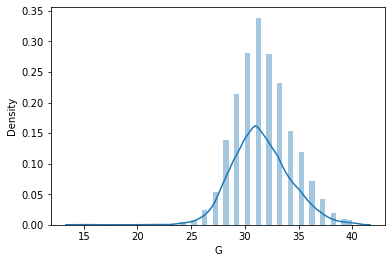

In [18]:
sns.distplot(CBB_Outlier_Treatment.G);

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


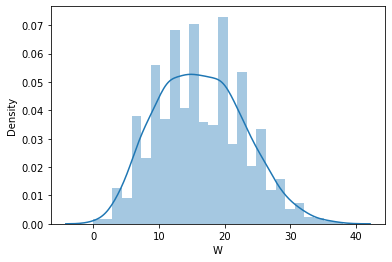

In [19]:
sns.distplot(CBB_Outlier_Treatment.W);

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


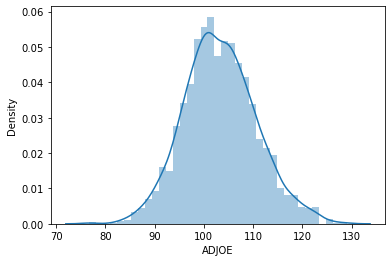

In [20]:
sns.distplot(CBB_Outlier_Treatment.ADJOE);


    We can visualize each variable like this.
    plots a frequency polygon superimposed on a histogram using the seaborn package.
    seaborn automatically creates class intervals. The number of bins can also be manually set.


For bivariate and univariate visualisation (diagnols will be showing univariate visualisation)

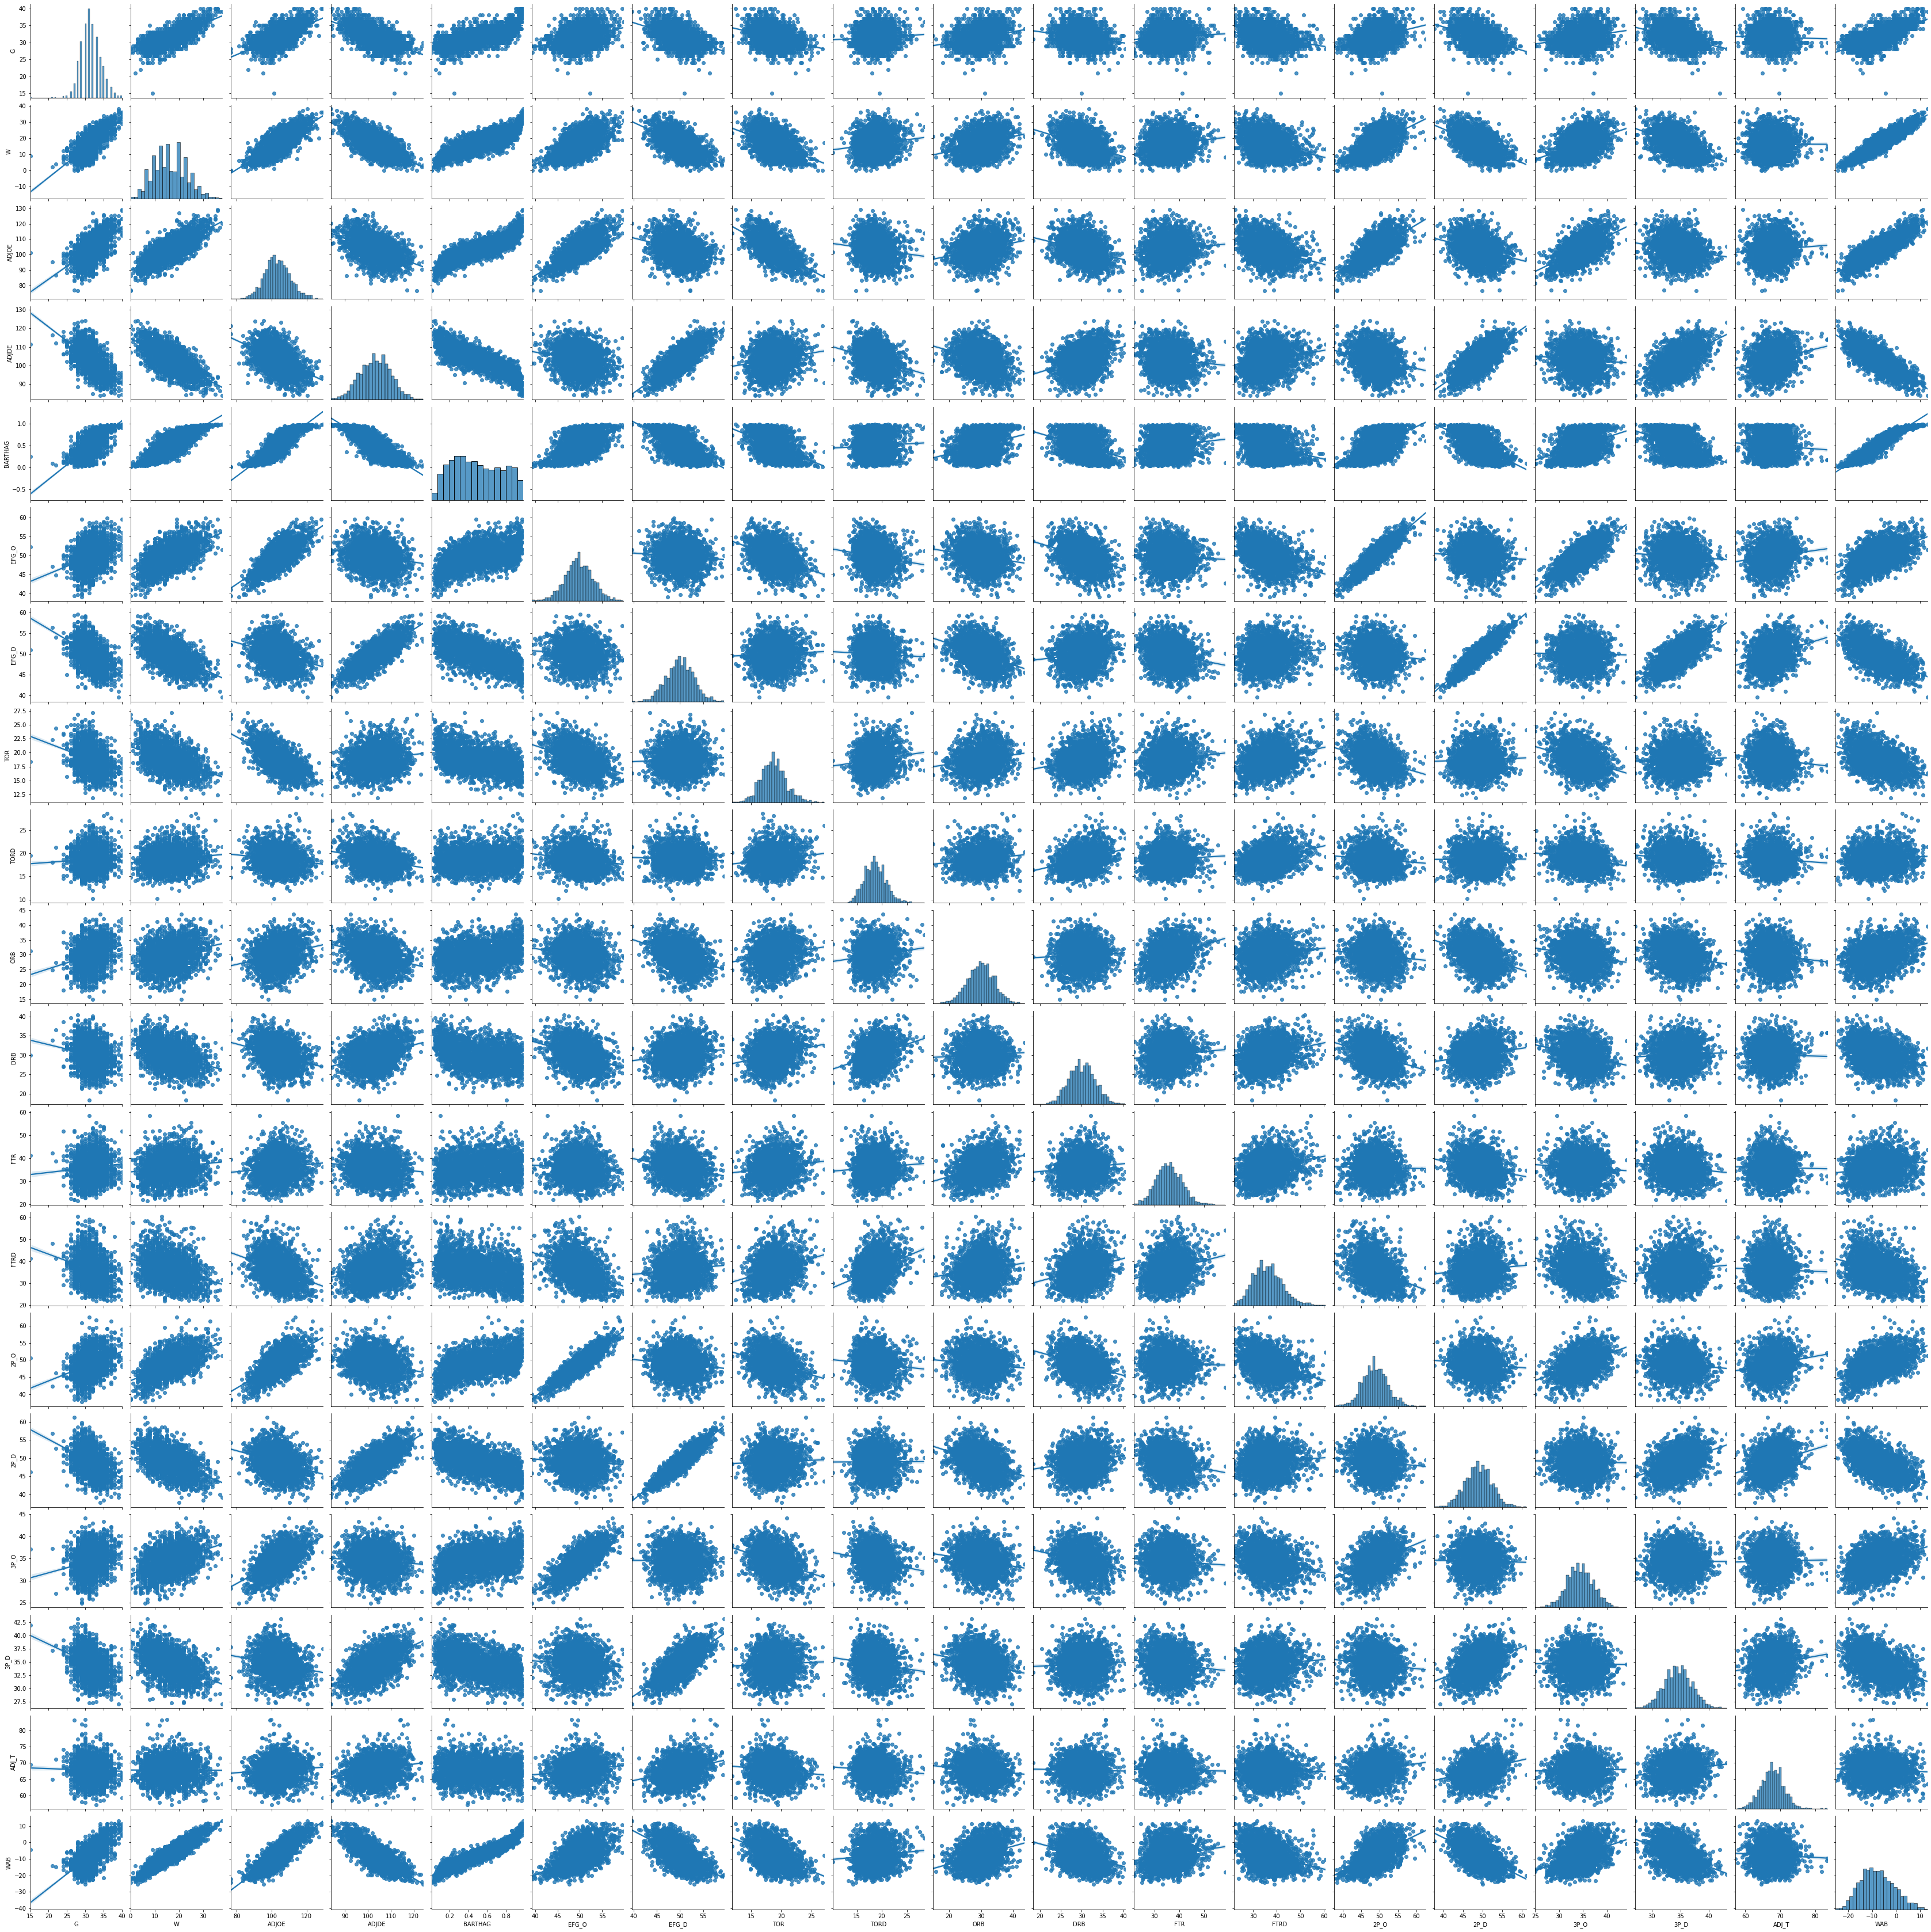

In [21]:
sns.pairplot(CBB_Outlier_Treatment, kind= "reg"); 


Analysing Correlation between two variables

The bivariate correlation, is a statistic that measures linear correlation between two variables X and Y. It has a value between +1 and −1.

    A closer the value towards 1 strong is a relationship and vice versa.
    A negative value stands for negative relationship.
    A positive value stands for positive relationship.
    A zero value means no relationship.


In [22]:
CBB_Outlier_Treatment.corr() # Method = Pearson

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
G        1.000000  0.724819  0.605112 -0.607700  0.693992  0.337732 -0.472541   
W        0.724819  1.000000  0.752293 -0.693442  0.827366  0.607659 -0.593197   
ADJOE    0.605112  0.752293  1.000000 -0.483926  0.860405  0.732286 -0.294531   
ADJDE   -0.607700 -0.693442 -0.483926  1.000000 -0.837534 -0.188506  0.796335   
BARTHAG  0.693992  0.827366  0.860405 -0.837534  1.000000  0.534765 -0.616040   
EFG_O    0.337732  0.607659  0.732286 -0.188506  0.534765  1.000000 -0.081205   
EFG_D   -0.472541 -0.593197 -0.294531  0.796335 -0.616040 -0.081205  1.000000   
TOR     -0.320922 -0.450942 -0.612410  0.170778 -0.457690 -0.382608  0.050050   
TORD     0.070594  0.139757 -0.135564 -0.264802  0.055207 -0.157895 -0.049485   
ORB      0.256390  0.284543  0.238660 -0.300670  0.303319 -0.169523 -0.360943   
DRB     -0.193746 -0.370802 -0.282303  0.322735 -0.338129 -0.335819  0.135325   
FTR      0.092973  0.145325  0.108035 -0.112217  0.132977 -0.060295 -0.212508   
FTRD    -0.262477 -0.325119 -0.343757  0.191314 -0.315761 -0.381692  0.098540   
2P_O     0.336933  0.584397  0.656954 -0.222889  0.511439  0.898690 -0.112840   
2P_D    -0.429289 -0.524085 -0.289752  0.737463 -0.579509 -0.069942  0.915149   
3P_O     0.217423  0.423510  0.572047 -0.078724  0.377816  0.767870 -0.019252   
3P_D    -0.359390 -0.475145 -0.186695  0.575623 -0.431773 -0.074900  0.727896   
ADJ_T   -0.033146 -0.003791  0.077011  0.224616 -0.077318  0.134885  0.285777   
WAB      0.664089  0.911297  0.839252 -0.794511  0.941104  0.551550 -0.614901   

              TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
G       -0.320922  0.070594  0.256390 -0.193746  0.092973 -0.262477  0.336933   
W       -0.450942  0.139757  0.284543 -0.370802  0.145325 -0.325119  0.584397   
ADJOE   -0.612410 -0.135564  0.238660 -0.282303  0.108035 -0.343757  0.656954   
ADJDE    0.170778 -0.264802 -0.300670  0.322735 -0.112217  0.191314 -0.222889   
BARTHAG -0.457690  0.055207  0.303319 -0.338129  0.132977 -0.315761  0.511439   
EFG_O   -0.382608 -0.157895 -0.169523 -0.335819 -0.060295 -0.381692  0.898690   
EFG_D    0.050050 -0.049485 -0.360943  0.135325 -0.212508  0.098540 -0.112840   
TOR      1.000000  0.140852  0.166679  0.218575  0.131914  0.274756 -0.314373   
TORD     0.140852  1.000000  0.133030  0.302787  0.076165  0.342788 -0.097024   
ORB      0.166679  0.133030  1.000000  0.056617  0.316561  0.146962 -0.103850   
DRB      0.218575  0.302787  0.056617  1.000000  0.101476  0.259970 -0.311623   
FTR      0.131914  0.076165  0.316561  0.101476  1.000000  0.246318 -0.020619   
FTRD     0.274756  0.342788  0.146962  0.259970  0.246318  1.000000 -0.370041   
2P_O    -0.314373 -0.097024 -0.103850 -0.311623 -0.020619 -0.370041  1.000000   
2P_D     0.042232  0.003779 -0.358273  0.162512 -0.208174  0.088039 -0.093779   
3P_O    -0.331216 -0.182614 -0.169115 -0.244643 -0.072248 -0.251978  0.420529   
3P_D     0.043686 -0.130751 -0.214153  0.050006 -0.117093  0.091851 -0.107507   
ADJ_T   -0.113341 -0.075896 -0.116339 -0.026524 -0.020590 -0.033357  0.179804   
WAB     -0.456938  0.093859  0.321862 -0.308972  0.174052 -0.317740  0.529034   

             2P_D      3P_O      3P_D     ADJ_T       WAB  
G       -0.429289  0.217423 -0.359390 -0.033146  0.664089  
W       -0.524085  0.423510 -0.475145 -0.003791  0.911297  
ADJOE   -0.289752  0.572047 -0.186695  0.077011  0.839252  
ADJDE    0.737463 -0.078724  0.575623  0.224616 -0.794511  
BARTHAG -0.579509  0.377816 -0.431773 -0.077318  0.941104  
EFG_O   -0.069942  0.767870 -0.074900  0.134885  0.551550  
EFG_D    0.915149 -0.019252  0.727896  0.285777 -0.614901  
TOR      0.042232 -0.331216  0.043686 -0.113341 -0.456938  
TORD     0.003779 -0.182614 -0.130751 -0.075896  0.093859  
ORB     -0.358273 -0.169115 -0.214153 -0.116339  0.321862  
DRB      0.162512 -0.244643  0.050006 -0.026524 -0.308972  
FTR     -0.208174 -0.072248 -0.117093 -0.020590  0.174

A visualisation relationship between variables through heatmap

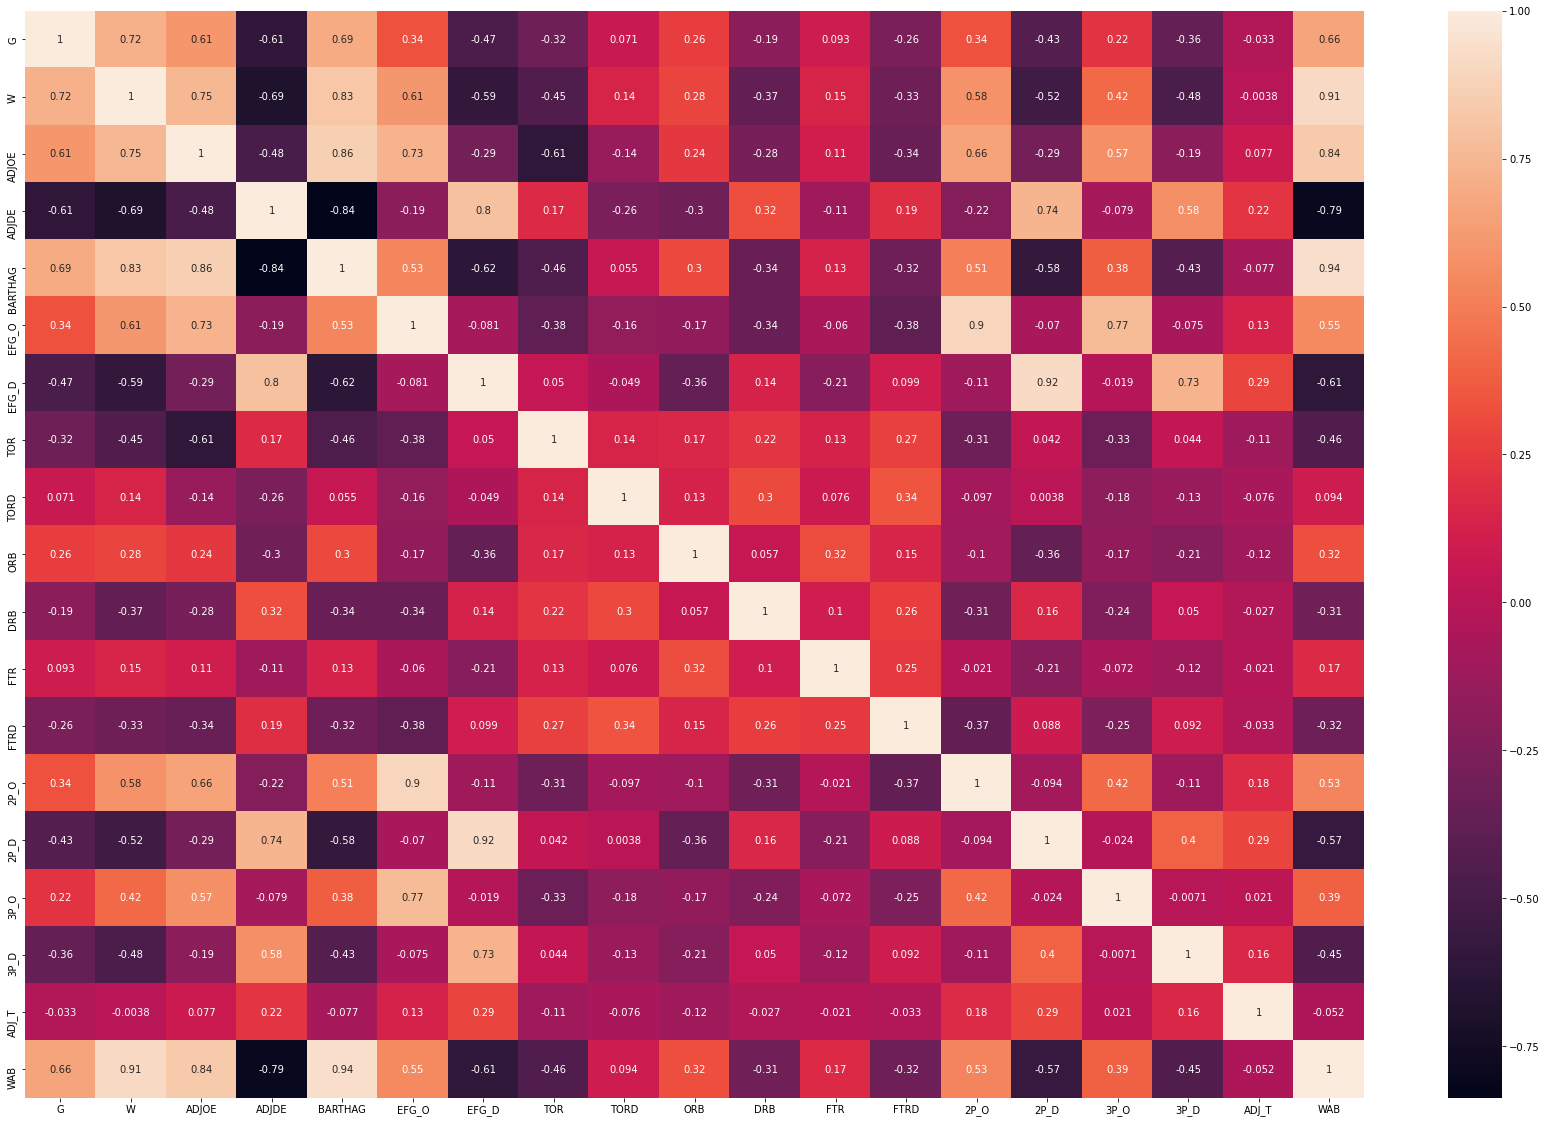

In [23]:
plt.figure(figsize= (30,20))
sns.heatmap(CBB_Outlier_Treatment.corr(), annot = True);

Plotting pivot table for categorical columns

In [24]:
pd.crosstab([CBB.TEAM,CBB.CONF,CBB.YEAR], CBB['W']).head(10)

W                            0   1   2   3   4   5   6   7   8   9   ...  29  \
TEAM              CONF YEAR                                          ...       
Abilene Christian Slnd 2014   0   0   1   0   0   0   0   0   0   0  ...   0   
                       2015   0   0   0   0   0   0   0   1   0   0  ...   0   
                       2016   0   0   0   0   0   0   0   0   0   1  ...   0   
                       2017   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2018   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2019   0   0   0   0   0   0   0   0   0   0  ...   0   
Air Force         MWC  2013   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2014   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2015   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2016   0   0   0   0   0   0   0   0   0   0  ...   0   

W                            30  31  32  33  34  35  36  37  38  
TEAM              CONF YEAR                                      
Abilene Christian Slnd 2014   0   0   0   0   0   0   0   0   0  
                       2015   0   0   0   0   0   0   0   0   0  
                       2016   0   0   0   0   0   0   0   0   0  
                       2017   0   0   0   0   0   0   0   0   0  
                       2018   0   0   0   0   0   0   0   0   0  
                       2019   0   0   0   0   0   0   0   0   0  
Air Force         MWC  2013   0   0   0   0   0   0   0   0   0  
                       2014   0   0   0   0   0   0   0   0   0  
                       2015   0   0   0   0   0   0   0   0   0  
                       2016   0   0   0   0   0   0   0   0   0  

[10 rows x 39 columns]

In [25]:
pd.crosstab([CBB.TEAM,CBB.CONF,CBB.YEAR], CBB['W']).tail(10)

W                         0   1   2   3   4   5   6   7   8   9   ...  29  30  \
TEAM           CONF YEAR                                          ...           
Yale           Ivy  2017   0   0   0   0   0   0   0   0   0   0  ...   0   0   
                    2018   0   0   0   0   0   0   0   0   0   0  ...   0   0   
                    2019   0   0   0   0   0   0   0   0   0   0  ...   0   0   
Youngstown St. Horz 2013   0   0   0   0   0   0   0   0   0   0  ...   0   0   
                    2014   0   0   0   0   0   0   0   0   0   0  ...   0   0   
                    2015   0   0   0   0   0   0   0   0   1   0  ...   0   0   
                    2016   0   0   0   0   0   0   0   0   0   1  ...   0   0   
                    2017   0   0   0   0   0   0   0   0   0   0  ...   0   0   
                    2018   0   0   0   0   0   0   0   0   1   0  ...   0   0   
                    2019   0   0   0   0   0   0   0   0   0   0  ...   0   0   

W                         31  32  33  34  35  36  37  38  
TEAM           CONF YEAR                                  
Yale           Ivy  2017   0   0   0   0   0   0   0   0  
                    2018   0   0   0   0   0   0   0   0  
                    2019   0   0   0   0   0   0   0   0  
Youngstown St. Horz 2013   0   0   0   0   0   0   0   0  
                    2014   0   0   0   0   0   0   0   0  
                    2015   0   0   0   0   0   0   0   0  
                    2016   0   0   0   0   0   0   0   0  
                    2017   0   0   0   0   0   0   0   0  
                    2018   0   0   0   0   0   0   0   0  
                    2019   0   0   0   0   0   0   0   0  

[10 rows x 39 columns]


    Handling non-numeric(Categorical) data through One Hot Encoding
    One-Hot-Encoding is used to create dummry variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record


In [26]:
CBB_dummies= pd.get_dummies(CBB, prefix='year', columns=['YEAR']) #This function does One-Hot-Encoding on categorical text

In [27]:
CBB_dummies.head()

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   

   ...   WAB  POSTSEASON  SEED  year_2013  year_2014  year_2015  year_2016  \
0  ...   8.6         2ND   1.0          0          0          0          1   
1  ...  11.3         2ND   1.0          0          0          1          0   
2  ...   6.9         2ND   3.0          0          0          0          0   
3  ...   7.0         2ND   3.0          0          0          0          0   
4  ...   7.7         2ND   1.0          0          0          0          0   

   year_2017  year_2018  year_2019  
0          0          0          0  
1          0          0          0  
2          0          1          0  
3          0          0          1  
4          1          0          0  

[5 rows x 30 columns]

An another way of doing it through Label Encoding that has to be imported from sklearn library

In [28]:
CBB_dummies.corr() # now we can analyze the relationship between variable year wise

G         W     ADJOE     ADJDE   BARTHAG     EFG_O  \
G          1.000000  0.724819  0.605112 -0.607700  0.693992  0.337732   
W          0.724819  1.000000  0.752293 -0.693442  0.827366  0.607659   
ADJOE      0.605112  0.752293  1.000000 -0.483926  0.860405  0.732286   
ADJDE     -0.607700 -0.693442 -0.483926  1.000000 -0.837534 -0.188506   
BARTHAG    0.693992  0.827366  0.860405 -0.837534  1.000000  0.534765   
EFG_O      0.337732  0.607659  0.732286 -0.188506  0.534765  1.000000   
EFG_D     -0.472541 -0.593197 -0.294531  0.796335 -0.616040 -0.081205   
TOR       -0.320922 -0.450942 -0.612410  0.170778 -0.457690 -0.382608   
TORD       0.070594  0.139757 -0.135564 -0.264802  0.055207 -0.157895   
ORB        0.256390  0.284543  0.238660 -0.300670  0.303319 -0.169523   
DRB       -0.193746 -0.370802 -0.282303  0.322735 -0.338129 -0.335819   
FTR        0.092973  0.145325  0.108035 -0.112217  0.132977 -0.060295   
FTRD      -0.262477 -0.325119 -0.343757  0.191314 -0.315761 -0.381692   
2P_O       0.336933  0.584397  0.656954 -0.222889  0.511439  0.898690   
2P_D      -0.429289 -0.524085 -0.289752  0.737463 -0.579509 -0.069942   
3P_O       0.217423  0.423510  0.572047 -0.078724  0.377816  0.767870   
3P_D      -0.359390 -0.475145 -0.186695  0.575623 -0.431773 -0.074900   
ADJ_T     -0.033146 -0.003791  0.077011  0.224616 -0.077318  0.134885   
WAB        0.664089  0.911297  0.839252 -0.794511  0.941104  0.551550   
SEED      -0.587325 -0.649496 -0.745243  0.697441 -0.826584 -0.238978   
year_2013 -0.002590 -0.033550 -0.137517 -0.153501  0.002305 -0.163857   
year_2014 -0.020960 -0.037464  0.070908  0.079131  0.002169 -0.042104   
year_2015 -0.024463 -0.038168 -0.054775 -0.061410 -0.000088 -0.108055   
year_2016 -0.009572 -0.035351  0.031117  0.034745 -0.001852 -0.003630   
year_2017  0.007071  0.044402  0.029681  0.033230 -0.002332  0.074875   
year_2018  0.011451  0.048451  0.058175  0.065105  0.001002  0.137975   
year_2019  0.038958  0.051398  0.001750  0.001964 -0.001189  0.103769   

              EFG_D       TOR      TORD       ORB  ...     ADJ_T       WAB  \
G         -0.472541 -0.320922  0.070594  0.256390  ... -0.033146  0.664089   
W         -0.593197 -0.450942  0.139757  0.284543  ... -0.003791  0.911297   
ADJOE     -0.294531 -0.612410 -0.135564  0.238660  ...  0.077011  0.839252   
ADJDE      0.796335  0.170778 -0.264802 -0.300670  ...  0.224616 -0.794511   
BARTHAG   -0.616040 -0.457690  0.055207  0.303319  ... -0.077318  0.941104   
EFG_O     -0.081205 -0.382608 -0.157895 -0.169523  ...  0.134885  0.551550   
EFG_D      1.000000  0.050050 -0.049485 -0.360943  ...  0.285777 -0.614901   
TOR        0.050050  1.000000  0.140852  0.166679  ... -0.113341 -0.456938   
TORD      -0.049485  0.140852  1.000000  0.133030  ... -0.075896  0.093859   
ORB       -0.360943  0.166679  0.133030  1.000000  ... -0.116339  0.321862   
DRB        0.135325  0.218575  0.302787  0.056617  ... -0.026524 -0.308972   
FTR       -0.212508  0.131914  0.076165  0.316561  ... -0.020590  0.174052   
FTRD       0.098540  0.274756  0.342788  0.146962  ... -0.033357 -0.317740   
2P_O      -0.112840 -0.314373 -0.097024 -0.103850  ...  0.179804  0.529034   
2P_D       0.915149  0.042232  0.003779 -0.358273  ...  0.286826 -0.565813   
3P_O      -0.019252 -0.331216 -0.182614 -0.169115  ...  0.020946  0.389754   
3P_D       0.727896  0.043686 -0.130751 -0.214153  ...  0.162986 -0.450984   
ADJ_T      0.285777 -0.113341 -0.075896 -0.116339  ...  1.000000 -0.052299   
WAB       -0.614901 -0.456938  0.093859  0.321862  ... -0.052299  1.000000   
SEED       0.387082  0.295071  0.008041 -0.289248  ...  0.045529 -0.918860   
year_2013 -0.173765  0.245138  0.233186  0.169198  ... -0.230020 -0.011154   
year_2014 -0.043706 -0.076457 -0.075772  0.127654  ... -0.151635  0.021266   
year_2015 -0.114063  0.070853  0.064999  0.097560  ... -0.358446  0.002201   
year_2016 -0.004350 -0.113145 -0.105692 -0.025435  ...  0.160606 -0.001124   
year_2017  0.079470 -0.

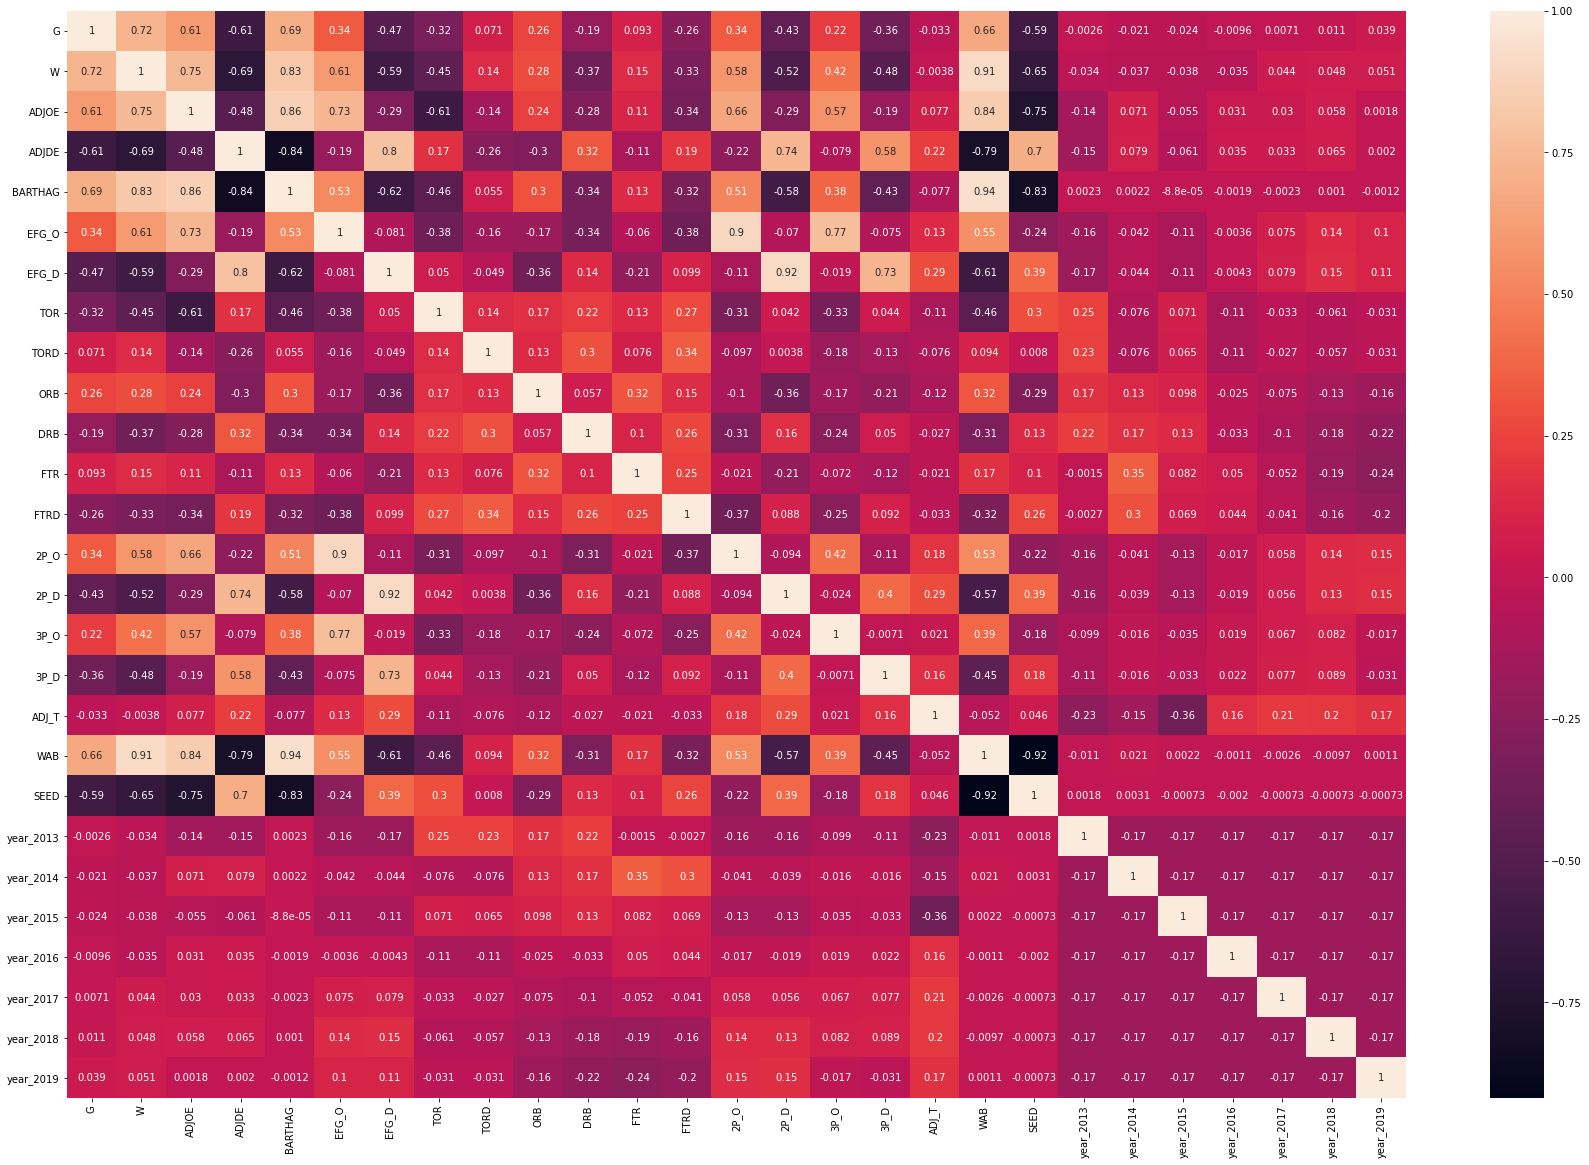

In [29]:
plt.figure(figsize= (30,20))
sns.heatmap(CBB_dummies.corr(), annot = True);

Although one major disadvantage of One hot encoding or dummies variable is that it will leads to form extra columns